# Customer Personality Analysis

In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import datetime as dt
import numpy as np                 # linear algebra
import pandas as pd                # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)

# For visulaizations
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from plotly import express as px
from plotly.subplots import make_subplots
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from yellowbrick.cluster import KElbowVisualizer
import pickle

# Input data files are available in the read-only "../input/" directory
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [7]:
# data = pd.read_csv("../input/customer/cust_seg.csv", header = 0)
data = pd.read_csv("D:/cust_seg.csv", header = 0)
data.head()

Unnamed: 0    ID  Birth_Year   Education Marital_Status   Income  Kidhome  \
0           0  5524        1963  Graduation         Single  58138.0        0   
1           1  2174        1960  Graduation         Single  46344.0        1   
2           2  4141        1971  Graduation       Together  71613.0        0   
3           3  6182        1990  Graduation       Together  26646.0        1   
4           4  5324        1987         PhD        Married  58293.0        1   

   Teenhome date_parsed  Recency  MntWines  MntFruits  MntMeatProducts  \
0         0  04-09-2018       58       635         88              546   
1         1  08-03-2020       38        11          1                6   
2         0  21-08-2019       26       426         49              127   
3         0  10-02-2020       26        11          4               20   
4         0  19-01-2020       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  
0         0              3         11         1  
1         0              3         11         0  
2         0              3         11         0  
3         0              3         11         0  
4         0              3         11         0

# 1. Basic Statistics

In [8]:
data = data.iloc[:, 1:]
data.head(7)

ID  Birth_Year   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1963  Graduation         Single  58138.0        0         0   
1  2174        1960  Graduation         Single  46344.0        1         1   
2  4141        1971  Graduation       Together  71613.0        0         0   
3  6182        1990  Graduation       Together  26646.0        1         0   
4  5324        1987         PhD        Married  58293.0        1         0   
5  7446        1973      Master       Together  62513.0        0         1   
6   965        1977  Graduation       Divorced  55635.0        0         1   

  date_parsed  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2018       58       635         88              546              172   
1  08-03-2020       38        11          1                6                2   
2  21-08-2019       26       426         49              127              111   
3  10-02-2020       26        11          4               20               10   
4  19-01-2020       94       173         43              118               46   
5  09-09-2019       16       520         42               98                0   
6  13-11-2018       34       235         65              164               50   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   
5                42            14                  2                6   
6                49            27                  4                7   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   
5                    4                 10                  6             0   
6                    3                  7                  6             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  
5              3         11         0  
6              3         11         0

In [9]:
data.shape

(2240, 29)

In [10]:
data.nunique()

ID                     2240
Birth_Year               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
date_parsed             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Birth_Year           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   date_parsed          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [12]:
data.describe()

ID   Birth_Year         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1974.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1899.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1965.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1976.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1983.000000   68522.000000     1.000000     1.000000   
max    11191.000000  2002.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

In [13]:
data["date_parsed"] = pd.to_datetime(data["date_parsed"])
dates = []
for i in data["date_parsed"]:
    i = i.date()
    dates.append(i)  

print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2020-12-06
The oldest customer's enrolment date in the records: 2018-01-08


# Inference of Customer Statistics
    1. The customer data has 2240 rows and 28 columns. No duplicates in data.
    2. Income count has 2240 - 2216 = 24 values missing.
    3. Maximum income corresponds to 666666.000000, while the percentiles are in between 35k to 68k. (Possible outliers).
    4. Maximun spendings on Wines, Fruits, MeatProducts, FishProducts, SweetProducts, GoldProducts. (Possible outliers).
    5. Mean Web site visits per month is 5 for 2k customers. The max value is 20.
    6. AcceptedCmp, Complain and Response columns are binomial. (0 or 1). 
    7. The enrollment date of newest customer is 06/12/2020, whereas of the oldest customer is 08/01/2018.

# 2. Data Wrangling
    1. Identifying Missing values
    2. Imputation of the missing values.    

In [14]:
missing_values = data.isna().sum().to_dict()
missing_values_df = pd.DataFrame(list(missing_values.items()), columns=['Column Names', 'Missing_Values'])

fig = px.bar(missing_values_df, x = 'Column Names', y = 'Missing_Values', title = 'Missing Values')
fig.show()

In [15]:
imputer = SimpleImputer(strategy = 'mean')

data["Income"] = imputer.fit_transform(data[["Income"]])
data.Income

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Birth_Year           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   date_parsed          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# 3. Customer Analysis

([<matplotlib.patches.Wedge at 0x272023945b0>,
 [Text(-0.010799092464652335, 1.099946989450828, 'Graduation'),
  Text(-0.840441051704004, -0.7096892549635142, 'PhD'),
  Text(0.3574766803682644, -1.0402934311976049, 'Master'),
  Text(0.9970110351959686, -0.4647246450291434, '2n Cycle'),
  Text(1.09684684539309, -0.08322858734369598, 'Basic')],
 [Text(-0.005890414071628546, 0.5999710851549971, '50.31%'),
  Text(-0.45842239183854755, -0.38710322998009866, '21.70%'),
  Text(0.1949872802008715, -0.567432780653239, '16.52%'),
  Text(0.5438242010159828, -0.2534861700158964, '9.06%'),
  Text(0.59828009748714, -0.04539741127837962, '2.41%')])

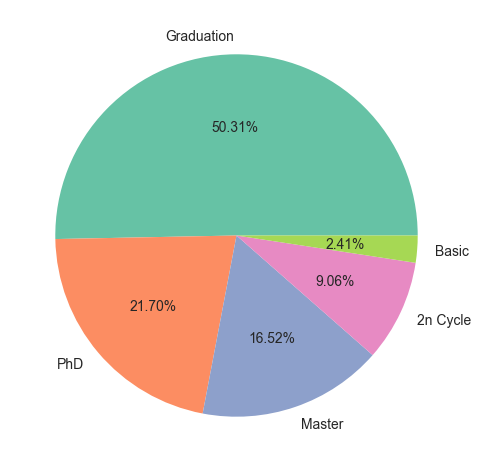

In [17]:
figure(figsize = (8, 6), dpi = 100)
color = sns.color_palette("Set2")
plt.pie(x = data["Education"].value_counts(), labels = data["Education"].value_counts().index, colors = color, autopct='%.2f%%')

Text(0, 0.5, 'Number of Customers')

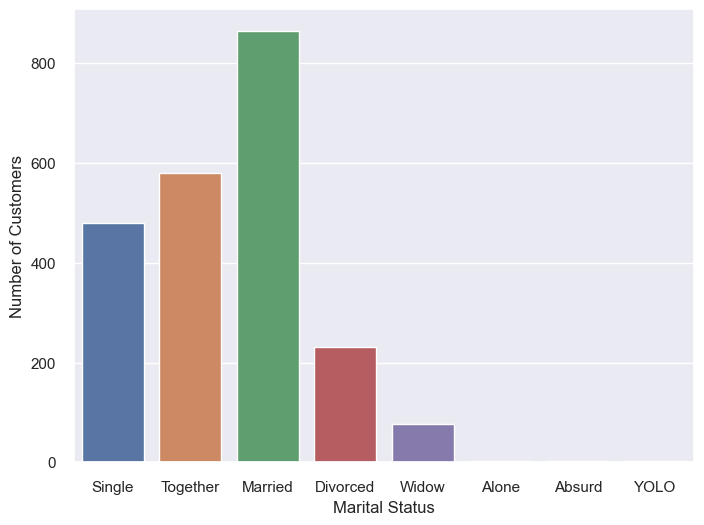

In [18]:
figure(figsize = (8, 6), dpi = 100)

sns.set_theme(style = "darkgrid")
plot = sns.countplot(x = data["Marital_Status"])
plot.set_xlabel("Marital Status")
plot.set_ylabel("Number of Customers")

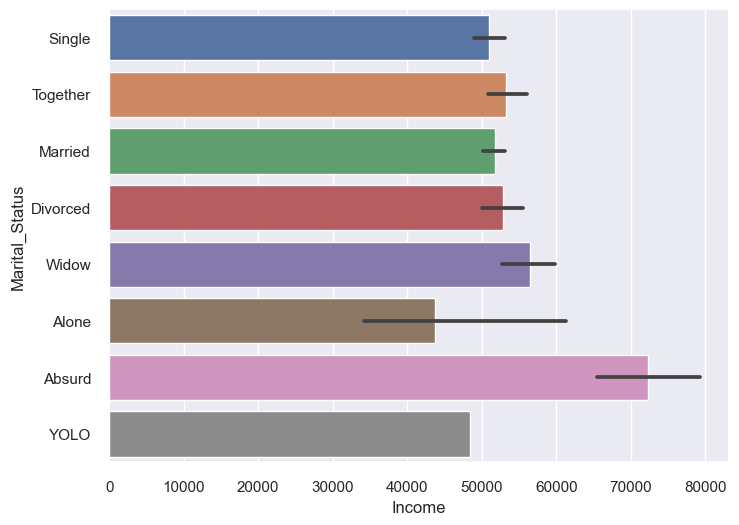

In [19]:
figure(figsize = (8, 6), dpi = 100)

plot = sns.barplot(x = "Income", y = "Marital_Status", data = data)

<AxesSubplot:xlabel='Birth_Year', ylabel='Income'>

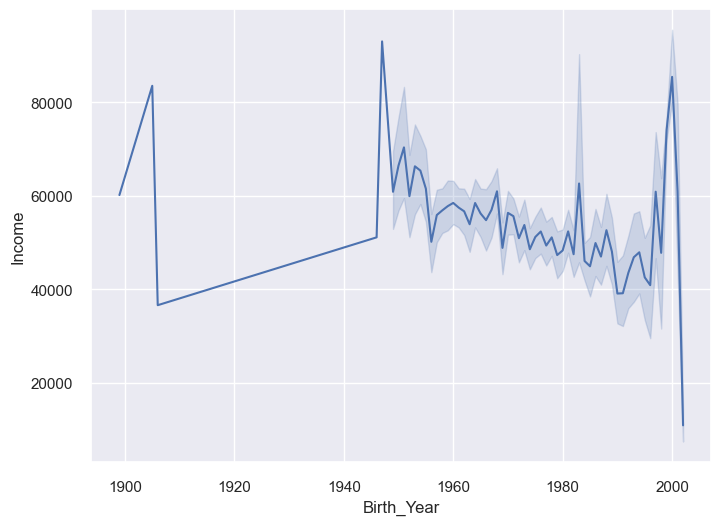

In [20]:
figure(figsize = (8, 6), dpi = 100)
sns.lineplot(x = "Birth_Year", y = "Income", data = data)

# 4.1 Feature Engineering: New Relations

**Total children** a customer has, i.e., [Kidhome] + [Teenhome]

In [21]:
data["kids"] = data["Kidhome"] + data["Teenhome"]
data[["ID", "Birth_Year", "Income", "Kidhome", "Teenhome", "kids"]]

ID  Birth_Year   Income  Kidhome  Teenhome  kids
0      5524        1963  58138.0        0         0     0
1      2174        1960  46344.0        1         1     2
2      4141        1971  71613.0        0         0     0
3      6182        1990  26646.0        1         0     1
4      5324        1987  58293.0        1         0     1
...     ...         ...      ...      ...       ...   ...
2235  10870        1973  61223.0        0         1     1
2236   4001        1952  64014.0        2         1     3
2237   7270        1987  56981.0        0         0     0
2238   8235        1962  69245.0        0         1     1
2239   9405        1960  52869.0        1         1     2

[2240 rows x 6 columns]

Since, the dataset contains the details of the customer enrolled with the company from **2018-2020**. Assume that the data was collected in **2021** and hence calculate the Age of customers from their [Birth_Year].

In [22]:
data["Age"] = 2021 - data["Birth_Year"]
data.Age

0       58
1       61
2       50
3       31
4       34
        ..
2235    48
2236    69
2237    34
2238    59
2239    61
Name: Age, Length: 2240, dtype: int64

Calculating **for how many months a customer has been associated with the comapny.** Upto the recent day.

In [23]:
data["date_parsed"] = pd.to_datetime(data["date_parsed"])
data["loyal_for_#_month"] = 12.0 * (2021 - data.date_parsed.dt.year ) + (1 - data.date_parsed.dt.month)
data[["ID", "Birth_Year", "date_parsed", "Age", "loyal_for_#_month"]]

ID  Birth_Year date_parsed  Age  loyal_for_#_month
0      5524        1963  2018-04-09   58               33.0
1      2174        1960  2020-08-03   61                5.0
2      4141        1971  2019-08-21   50               17.0
3      6182        1990  2020-10-02   31                3.0
4      5324        1987  2020-01-19   34               12.0
...     ...         ...         ...  ...                ...
2235  10870        1973  2019-06-13   48               19.0
2236   4001        1952  2020-10-06   69                3.0
2237   7270        1987  2020-01-25   34               12.0
2238   8235        1962  2020-01-24   59               12.0
2239   9405        1960  2018-10-15   61               27.0

[2240 rows x 5 columns]

Customer has spent the money on various products, such as Wines, fruits, meat products, fish products, sweet products and gold products. Summing up the **entire expenditure of a customer as [total_spending].**

In [24]:
data["total_spending"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
data.total_spending

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: total_spending, Length: 2240, dtype: int64

The customers can be categorized into **4 distinct age groups** with respect to their given age.

    1. Teen
    2. Adult
    3. Middle Age Adult
    4. Senior Adult

In [25]:
data.loc[(data['Age'] >= 13) & (data['Age'] <= 19), 'AgeGroup'] = 'Teen'
data.loc[(data['Age'] >= 20) & (data['Age']<= 39), 'AgeGroup'] = 'Adult'
data.loc[(data['Age'] >= 40) & (data['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
data.loc[(data['Age'] > 60), 'AgeGroup'] = 'Senior Adult'
data[["Birth_Year", "Age", "AgeGroup"]]

Birth_Year  Age          AgeGroup
0           1963   58  Middle Age Adult
1           1960   61      Senior Adult
2           1971   50  Middle Age Adult
3           1990   31             Adult
4           1987   34             Adult
...          ...  ...               ...
2235        1973   48  Middle Age Adult
2236        1952   69      Senior Adult
2237        1987   34             Adult
2238        1962   59  Middle Age Adult
2239        1960   61      Senior Adult

[2240 rows x 3 columns]

Customer Marital Status has many different string values, most of which fall under the same category. So, It can be broadly classified as:

    1. Single
    2. Partner 

In [26]:
marriage_dict = {
    'Together': 'Partner',
    'Married' : 'Partner',
    'Divorced' : 'Single',
    'Widow' : 'Single',
    'Alone' : 'Single',
    'Absurd' : 'Single',
    'YOLO' : 'Single'
}
data["Marital_Status"] = data["Marital_Status"].replace(marriage_dict)
data.head(5)

ID  Birth_Year   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1963  Graduation         Single  58138.0        0         0   
1  2174        1960  Graduation         Single  46344.0        1         1   
2  4141        1971  Graduation        Partner  71613.0        0         0   
3  6182        1990  Graduation        Partner  26646.0        1         0   
4  5324        1987         PhD        Partner  58293.0        1         0   

  date_parsed  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2018-04-09       58       635         88              546              172   
1  2020-08-03       38        11          1                6                2   
2  2019-08-21       26       426         49              127              111   
3  2020-10-02       26        11          4               20               10   
4  2020-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  kids  Age  loyal_for_#_month  \
0              3         11         1     0   58               33.0   
1              3         11         0     2   61                5.0   
2              3         11         0     0   50               17.0   
3              3         11         0     1   31                3.0   
4              3         11         0     1   34               12.0   

   total_spending          AgeGroup  
0            1617  Middle Age Adult  
1              27      Senior Adult  
2             776  Middle Age Adult  
3              53             Adult  
4             422             Adult

Finding out the **total family size of the customers**.

In [27]:
data["family_size"] = data["kids"] + data["Marital_Status"].replace({'Single': 1, 'Partner': 2})
data.head(5)

ID  Birth_Year   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1963  Graduation         Single  58138.0        0         0   
1  2174        1960  Graduation         Single  46344.0        1         1   
2  4141        1971  Graduation        Partner  71613.0        0         0   
3  6182        1990  Graduation        Partner  26646.0        1         0   
4  5324        1987         PhD        Partner  58293.0        1         0   

  date_parsed  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2018-04-09       58       635         88              546              172   
1  2020-08-03       38        11          1                6                2   
2  2019-08-21       26       426         49              127              111   
3  2020-10-02       26        11          4               20               10   
4  2020-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  kids  Age  loyal_for_#_month  \
0              3         11         1     0   58               33.0   
1              3         11         0     2   61                5.0   
2              3         11         0     0   50               17.0   
3              3         11         0     1   31                3.0   
4              3         11         0     1   34               12.0   

   total_spending          AgeGroup  family_size  
0            1617  Middle Age Adult            1  
1              27      Senior Adult            3  
2             776  Middle Age Adult            2  
3              53             Adult            3  
4             422             Adult            3

Creating a new binary column to classify whether a customer is **parent** or not.

In [28]:
data["Is_parent"] = np.where(data["kids"] > 0, 1, 0)

The education level or degree of the customers can be mainly categorized into **3** different groups:

    1. Under Graduate
    2. Graduate
    3. Post Graduate

In [29]:
data["Education"] = data["Education"].replace({
    "Basic":"Undergraduate",
    "2n Cycle":"Undergraduate", 
    "Graduation":"Graduate", 
    "Master":"Postgraduate", 
    "PhD":"Postgraduate"
})
data.head(5)

ID  Birth_Year     Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1963      Graduate         Single  58138.0        0         0   
1  2174        1960      Graduate         Single  46344.0        1         1   
2  4141        1971      Graduate        Partner  71613.0        0         0   
3  6182        1990      Graduate        Partner  26646.0        1         0   
4  5324        1987  Postgraduate        Partner  58293.0        1         0   

  date_parsed  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2018-04-09       58       635         88              546              172   
1  2020-08-03       38        11          1                6                2   
2  2019-08-21       26       426         49              127              111   
3  2020-10-02       26        11          4               20               10   
4  2020-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  kids  Age  loyal_for_#_month  \
0              3         11         1     0   58               33.0   
1              3         11         0     2   61                5.0   
2              3         11         0     0   50               17.0   
3              3         11         0     1   31                3.0   
4              3         11         0     1   34               12.0   

   total_spending          AgeGroup  family_size  Is_parent  
0            1617  Middle Age Adult            1          0  
1              27      Senior Adult            3          1  
2             776  Middle Age Adult            2          0  
3              53             Adult            3          1  
4             422             Adult            3          1

Now, we copy our dataset into newly formed Dataframe **data_new**. Also, discarding the redundant values from new Dataframe: 

    1. Marital_Status 
    2. date_parsed
    3. Z_CostContact, Z_Revenue
    4. Promotions and deals, i.e., [AcceptedCmp]s
    5. Year_Birth
    6. ID
    7. Age Group, complains and responses.

In [30]:
data_new = data.copy()
data_new.drop(['date_parsed', 'Z_CostContact', 'Z_Revenue', 'Birth_Year', 'ID', 'AgeGroup', \
               'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response'], 
             axis = 1, inplace = True)

In [31]:
data_new.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    52247.251354     0.444196     0.506250    49.109375   303.935714   
std     25037.797168     0.538398     0.544538    28.962453   336.597393   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35538.750000     0.000000     0.000000    24.000000    23.750000   
50%     51741.500000     0.000000     0.000000    49.000000   173.500000   
75%     68289.750000     1.000000     1.000000    74.000000   504.250000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2240.000000      2240.000000      2240.000000       2240.000000   
mean     26.302232       166.950000        37.525446         27.062946   
std      39.773434       225.715373        54.628979         41.280498   
min       0.000000         0.000000         0.000000          0.000000   
25%       1.000000        16.000000         3.000000          1.000000   
50%       8.000000        67.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        263.000000   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count   2240.000000        2240.000000      2240.000000          2240.000000   
mean      44.021875           2.325000         4.084821             2.662054   
std       52.167439           1.932238         2.778714             2.923101   
min        0.000000           0.000000         0.000000             0.000000   
25%        9.000000           1.000000         2.000000             0.000000   
50%       24.000000           2.000000         4.000000             2.000000   
75%       56.000000           3.000000         6.000000             4.000000   
max      362.000000          15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth         kids          Age  \
count        2240.000000        2240.000000  2240.000000  2240.000000   
mean            5.790179           5.316518     0.950446    46.194196   
std             3.250958           2.426645     0.751803    11.984069   
min             0.000000           0.000000     0.000000    19.000000   
25%             3.000000           3.000000     0.000000    38.000000   
50%             5.000000           6.000000     1.000000    45.000000   
75%             8.000000           7.000000     1.000000    56.000000   
max            13.000000          20.000000     3.000000   122.000000   

       loyal_for_#_month  total_spending  family_size    Is_parent  
count        2240.000000     2240.000000  2240.000000  2240.000000  
mean           18.142411      605.798214     2.595089     0.715179  
std             7.659851      602.249288     0.906959     0.451430  
min             1.000000        5.000000     1.000000     0.000000  
25%            13.000000       68.750000     2.000000     0.000000  
50%            18.000000      396.000000     3.000000     1.000000  
75%            24.000000     1045.500000     3.000000     1.000000  
max            36.000000     2525.000000     5.000000     1.000000

# 4.2 Feature Engineering: Outliers Treatment and Correlation

Relative plot of the subset of Customer dataset.


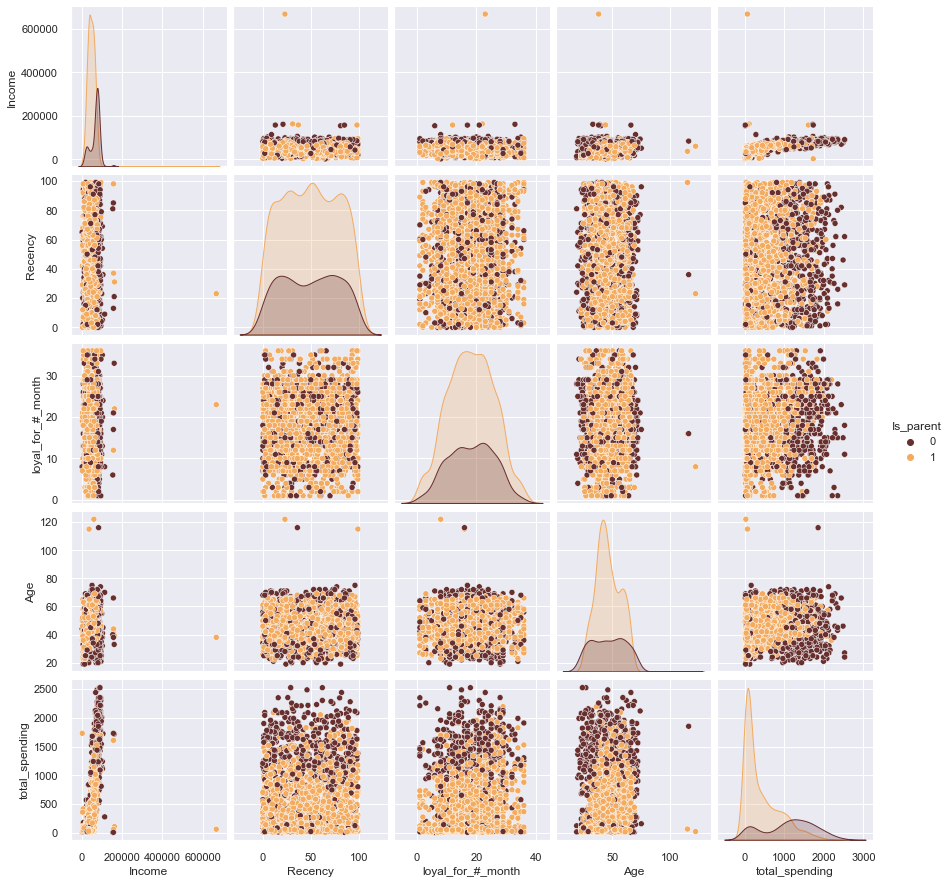

In [32]:
print("Relative plot of the subset of Customer dataset.")
sns.pairplot(data_new[["Income", "Recency", "loyal_for_#_month", "Age", "total_spending", "Is_parent"]], 
             hue = "Is_parent", 
             palette = (["#682F2F","#F3AB60"]))

From the plot, it is clear that the columns **Age** and **Income** has some outliers. We will be removing those outliers.

In [33]:
data_new = data_new[(data_new["Age"] <= 90)]
data_new = data_new[(data_new["Income"] < 600000)]
data_new.shape

(2236, 23)

<AxesSubplot:>

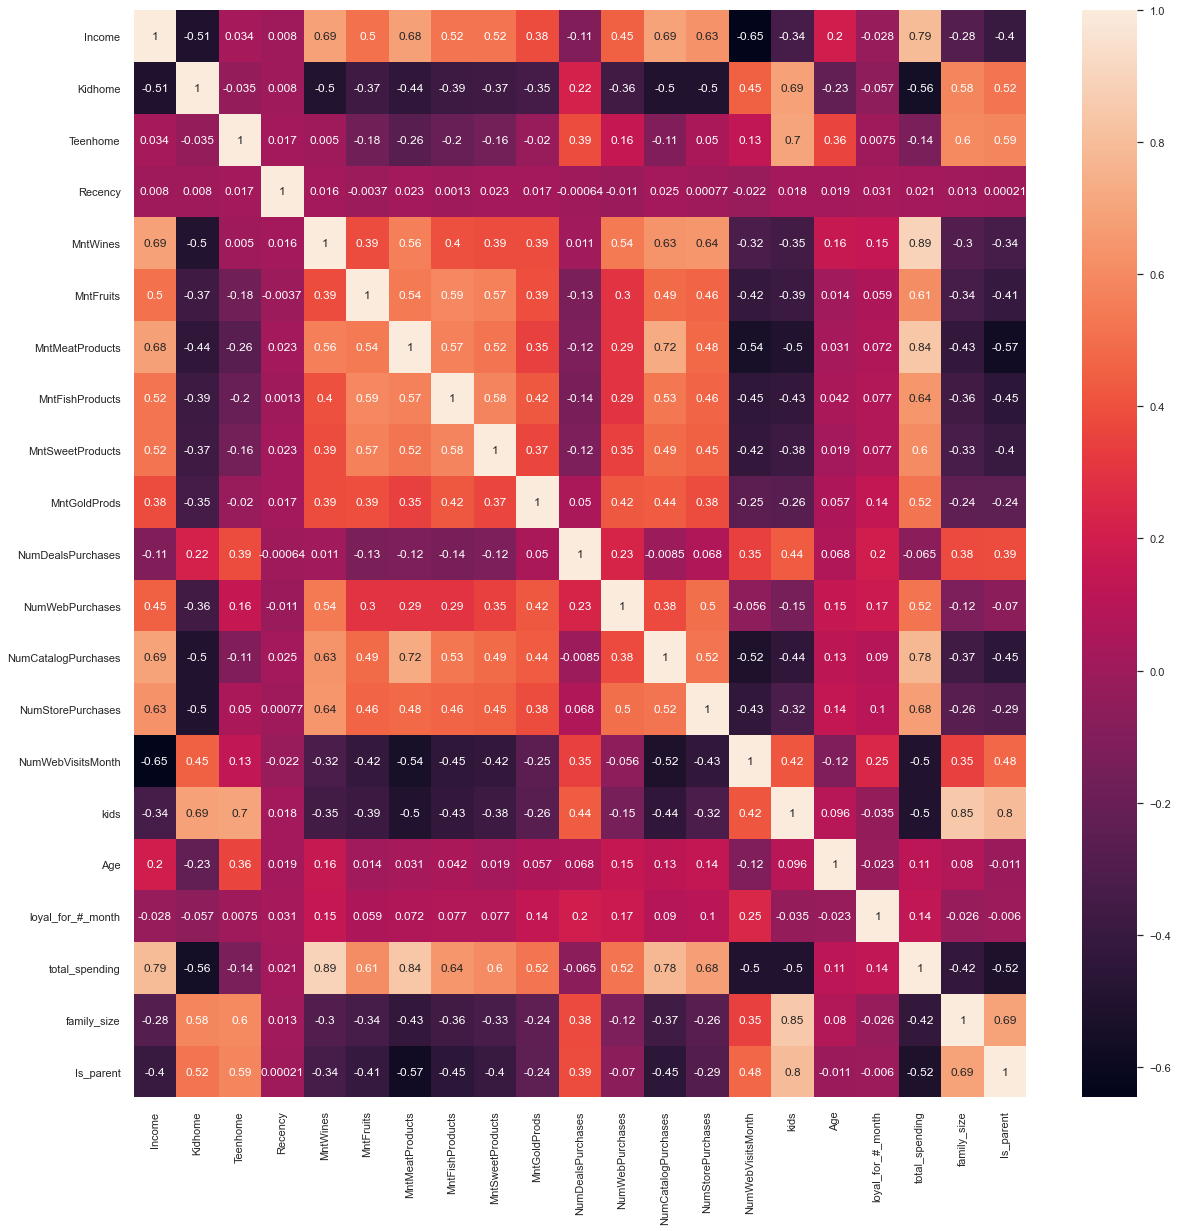

In [34]:
# checking for correlaion.
cor = data_new.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor, annot = True)

# Inference of the plot

    1. Correlated components (> 0.78): [Income, total_spendings], [MntWines, totalspendings],
                                        [MntMeatProducts, totalspendings], [kids, family_size] and [kids, Is_parent]. 
    2. Inference:
        -> High income customers spends more.
        -> Most customers spend more on Wines and Meat products.
        -> Customer with kids are more likely to have a family 
    

# 5. Data Preprocessing
    1. Encoding of the categorical variables.
    2. Scaling the data, since the range varies greatly in some of the coulumns.
    3. Apply Dimensionality Reduction technique.

In [35]:
categorical_columns = data_new.select_dtypes(include = ["object"]).columns

encoder = LabelEncoder()
for i in categorical_columns:
    data_new[i] = data_new[[i]].apply(encoder.fit_transform)
data_new.head(3)

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0          0               1  58138.0        0         0       58       635   
1          0               1  46344.0        1         1       38        11   
2          0               0  71613.0        0         0       26       426   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   

   NumStorePurchases  NumWebVisitsMonth  kids  Age  loyal_for_#_month  \
0                  4                  7     0   58               33.0   
1                  2                  5     2   61                5.0   
2                 10                  4     0   50               17.0   

   total_spending  family_size  Is_parent  
0            1617            1          0  
1              27            3          1  
2             776            2          0

In [36]:
scaler = StandardScaler()
scaler.fit(data_new)
scaled_data = pd.DataFrame(scaler.transform(data_new), columns = data_new.columns)
scaled_data.head()

Education  Marital_Status    Income   Kidhome  Teenhome   Recency  \
0   -0.89438        1.347635  0.288513 -0.824939 -0.930615  0.306856   
1   -0.89438        1.347635 -0.262438  1.032627  0.905974 -0.383971   
2   -0.89438       -0.742041  0.917992 -0.824939 -0.930615 -0.798467   
3   -0.89438       -0.742041 -1.182621  1.032627 -0.930615 -0.798467   
4    0.57070       -0.742041  0.295754  1.032627 -0.930615  1.550344   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0  0.983228   1.554170         1.679746         2.461068          1.475396   
1 -0.871064  -0.636431        -0.713455        -0.650414         -0.631638   
2  0.362159   0.572177        -0.177201         1.344595         -0.147262   
3 -0.871064  -0.560893        -0.651409        -0.503991         -0.583200   
4 -0.389661   0.421101        -0.217088         0.154911         -0.001950   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0      0.845669           0.348738         1.407639             2.509801   
1     -0.729742          -0.168700        -1.110921            -0.568970   
2     -0.038098          -0.686137         1.407639            -0.226884   
3     -0.748954          -0.168700        -0.751127            -0.911056   
4     -0.556831           1.383614         0.328256             0.115201   

   NumStorePurchases  NumWebVisitsMonth      kids       Age  \
0          -0.552429           0.692865 -1.264308  1.016868   
1          -1.167738          -0.131421  1.395139  1.273264   
2           1.293496          -0.543564 -1.264308  0.333146   
3          -0.552429           0.280722  0.065416 -1.290693   
4           0.062879          -0.131421  0.065416 -1.034298   

   loyal_for_#_month  total_spending  family_size  Is_parent  
0           1.938814        1.680176    -1.758810  -1.584362  
1          -1.716048       -0.962202     0.445618   0.631169  
2          -0.149678        0.282541    -0.656596  -1.584362  
3          -1.977109       -0.918994     0.445618   0.631169  
4          -0.802332       -0.305762     0.445618   0.631169

# 6. Dimensionality Reduction: Principal Component Analysis (PCA)

Text(0, 0.5, 'Cumulative explained variance')

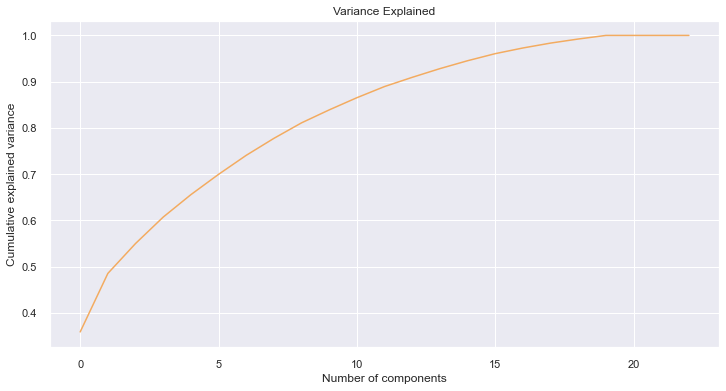

In [37]:
pca_dummy = PCA()
pca_dummy.fit(scaled_data)

plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca_dummy.explained_variance_ratio_), color = '#F3AB60')
plt.title("Variance Explained")
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

From the plot, it is clear that the **first 5 Principal Components** contributed almost **70%** of the variance. We will reduce to **5 components** using PCA.

In [236]:
pca = PCA(n_components = 5)

pca.fit(scaled_data)
reduced_data = pd.DataFrame(pca.transform(scaled_data), columns = ['col1', 'col2', 'col3', 'col4', 'col5'])
reduced_data.describe()

col1          col2          col3          col4          col5
count  2.236000e+03  2.236000e+03  2.236000e+03  2.236000e+03  2.236000e+03
mean  -6.991029e-17  8.262125e-17  2.859966e-17  6.117150e-17 -9.533221e-17
std    2.872926e+00  1.706355e+00  1.219714e+00  1.146883e+00  1.056495e+00
min   -5.963475e+00 -4.325011e+00 -3.461201e+00 -3.128215e+00 -2.999538e+00
25%   -2.529568e+00 -1.333459e+00 -8.210223e-01 -7.591201e-01 -6.877439e-01
50%   -7.804380e-01 -1.564426e-01 -3.363360e-02 -9.783862e-03 -6.373339e-03
75%    2.377251e+00  1.237737e+00  8.007016e-01  9.065889e-01  7.469527e-01
max    7.450355e+00  6.107674e+00  6.557285e+00  3.349130e+00  3.095515e+00

# 7. Clustering
    1. Use KMeans algorithm to find the optimum number of clusters with the Elbow method.
    2. Create a Agglomerative Clustering Model (a hierarchical clustering method).

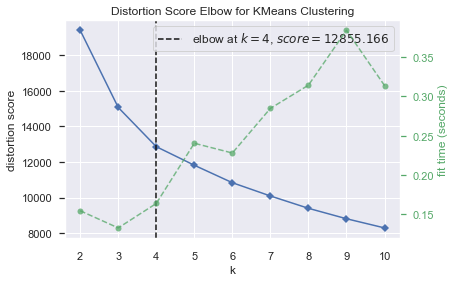

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(reduced_data)
elbow_method.show()

From the plot, the **optimal number of clusters: 4**. Now, to apply **KMeans Clustering**.

In [276]:
kmeans = KMeans(n_clusters = 4, random_state = 8)
clusters = kmeans.fit_predict(reduced_data)

reduced_data["cluster"] = clusters
np.unique(clusters, return_counts = True)

(array([0, 1, 2, 3]), array([520, 604, 558, 554], dtype=int64))

KMeans output: (array([0, 1, 2, 3], dtype=int32), array([518, 604, 560, 554]))

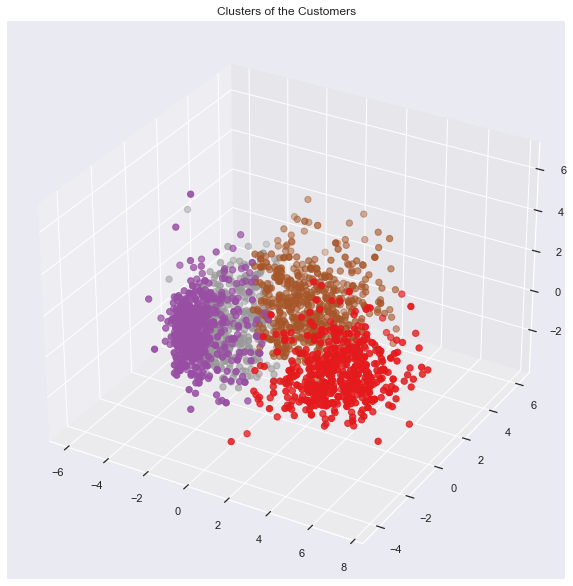

In [281]:
x = reduced_data["col1"]
y = reduced_data["col2"]
z = reduced_data["col3"]

fig = plt.figure(figsize=(10,15))

axes = plt.subplot(111, projection='3d', label="bla")
axes.scatter(x, y, z, s=40, c=reduced_data["cluster"], marker='o', cmap = 'Set1' )
axes.set_title("Clusters of the Customers")
plt.show()

# 8. Evaluation of the Clusters

Text(0, 0.5, 'Clusters')

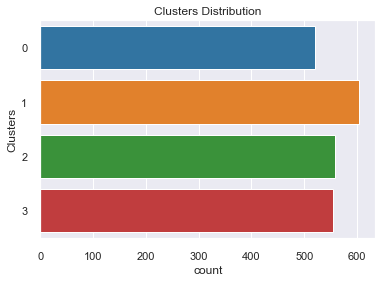

In [280]:
plot = sns.countplot(y = clusters, palette = "tab10")
plot.set_title("Clusters Distribution")
plot.set_ylabel("Clusters")

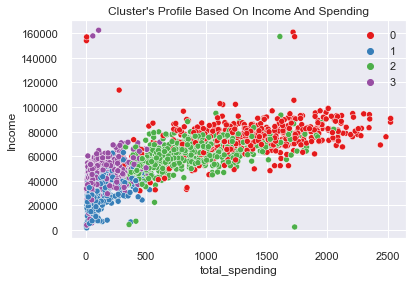

In [279]:
plot = sns.scatterplot(data = data_new ,x=data_new["total_spending"], y=data_new["Income"], 
                       hue = clusters, palette = "Set1")
plot.set_title("Cluster's Profile Based On Income And Spending")
plot.legend()

From the plot, we can interpret that:
    
    1. Customers in Cluster 0: High Income and High Spendings.
    2. Customers in Cluster 1: Low Income and Low Spendings.
    3. Customers in Cluster 2: Average Income and High Spendings.
    4. Customers in Cluster 3: Average Income and Low Spendings.
    
Now, looking at the **investments pattern of the customers** for **different products**.

Text(0, 0.5, 'Total Spendings of the Customer')

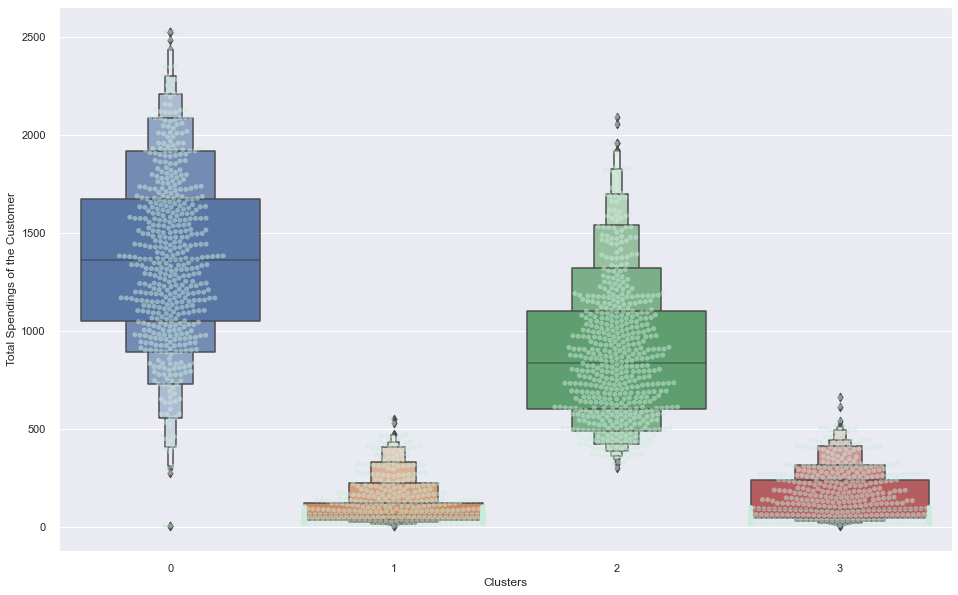

In [282]:
plt.figure(figsize = (16, 10))
plot = sns.swarmplot(x = clusters, y = data_new["total_spending"], color= "#CBEDDD", alpha=0.5)
plot = sns.boxenplot(x = clusters, y = data_new["total_spending"])
plt.xlabel("Clusters")
plt.ylabel("Total Spendings of the Customer")

From the plot, Customers in the **Cluster 0** are the most profitable one, followed by **Cluster 2** and so on. 

Further, we consider the impact of **Promotions and Campaign** on our clusters of customers.

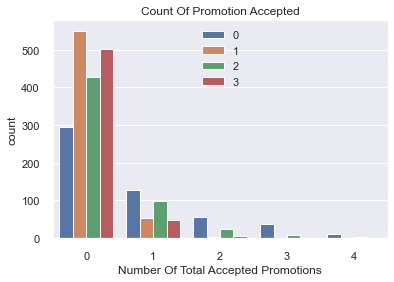

In [283]:
data_new["Promos_accepted"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"]+ data["AcceptedCmp5"]

plt.figure()
plot = sns.countplot(x=data_new["Promos_accepted"], hue = clusters)
plot.set_title("Count Of Promotion Accepted")
plot.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

The plot depicts that **no one take part** in all 5 of the Campaigns. The responses to campaign has **not been so good**. Overall, only a few participants show interest towards it.

Solutions: 
    
    1. Better Planned Campaigns on customer interests.
    2. Specific Campaigns for different types of customers.

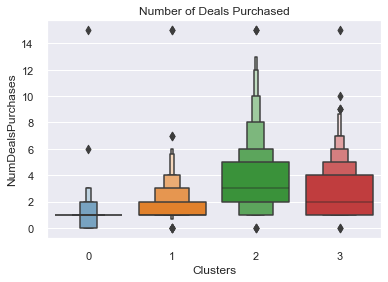

In [284]:
plt.figure()
plot = sns.boxenplot(y = data_new["NumDealsPurchases"], x = clusters, palette = "tab10")
plot.set_title("Number of Deals Purchased")
plt.xlabel("Clusters")
plt.show()

From the plot, the deals offered **attracted more customers** unlike the promotional campaigns. The customers in **clusters 2 and 3** seemeed to invest more on deals.

We will be profiling the clusters formed to identify who is our star customer and who needs more attention from the retail store's marketing team.

We will plot some of the features indicating customer's personality traits.

<Figure size 432x288 with 0 Axes>

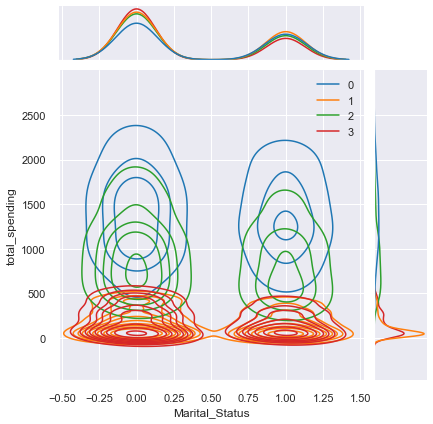

<Figure size 432x288 with 0 Axes>

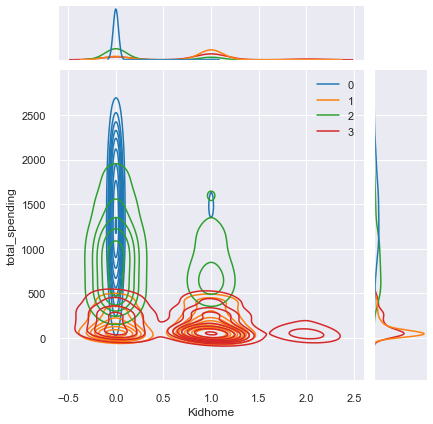

<Figure size 432x288 with 0 Axes>

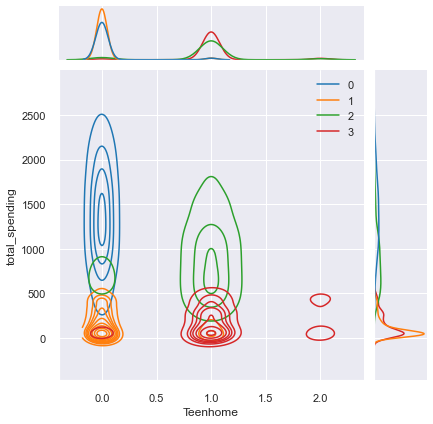

<Figure size 432x288 with 0 Axes>

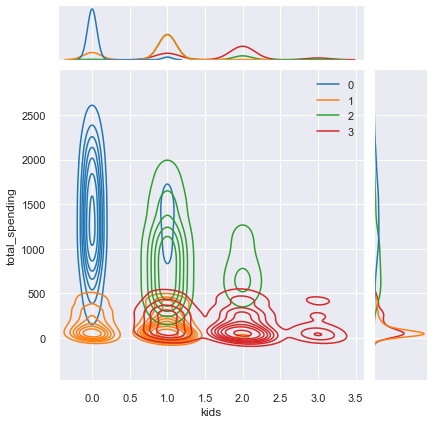

<Figure size 432x288 with 0 Axes>

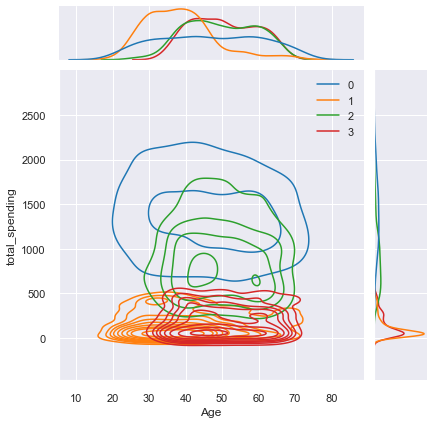

<Figure size 432x288 with 0 Axes>

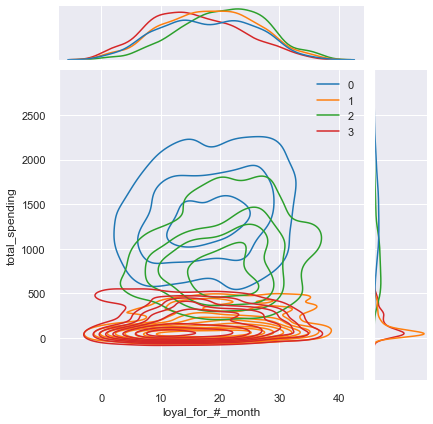

<Figure size 432x288 with 0 Axes>

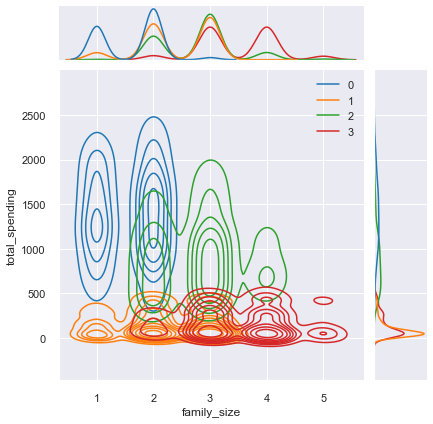

<Figure size 432x288 with 0 Axes>

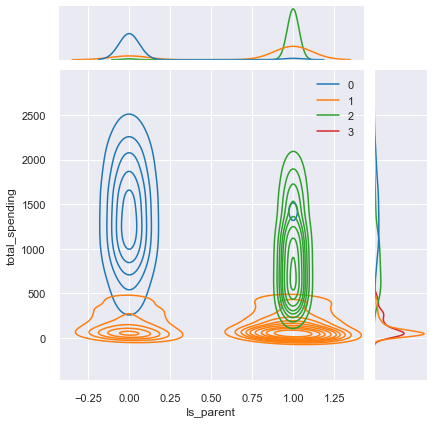

<Figure size 432x288 with 0 Axes>

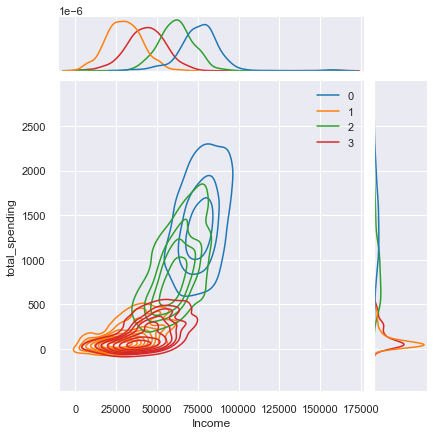

In [285]:
personality = ["Marital_Status", "Kidhome", "Teenhome", "kids", "Age", "loyal_for_#_month", \
               "family_size", "Is_parent", "Income"]

for i in personality:
    plt.figure()
    sns.jointplot(x = data_new[i], y=data_new["total_spending"], hue = clusters, kind = "kde", palette = "tab10")
    plt.show()


# Customer Personality Inference 

Customers in Cluster 0:

    1. They are definitely not a parent.
    2. Maximum 2 members in the family.
    3. Equally Single and Married. But Singles are slighty greater.
    4. All Ages.
    5. High Income.
    
Customers in Cluster 1:

    1. Majority of them are parents.
    2. Maximum 3 members in the family.
    3. Relatively Younger.
    4. Lower Income Group.

Customers in Cluster 2:

    1. Average to high Incomed.
    2. Are definitely a Parent.
    3. Family size of minimum 2 and maximum 4.
    4. Relatively Older.
    5. Most have a teenager at home.

Customers in Cluster 3:

    1. Definitely a Parent.
    2. Relatively Older.
    3. Family size of minimum 2 and maximum 5. 
    4. Have Small kid and teenager both.
    5. Lower Income group.

# 9. Creating Production Pipeline

In [291]:
data_new = data_new.drop(["Promos_accepted"], axis = 1)
data_new.head(2)

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0          0               1  58138.0        0         0       58       635   
1          0               1  46344.0        1         1       38        11   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   

   NumStorePurchases  NumWebVisitsMonth  kids  Age  loyal_for_#_month  \
0                  4                  7     0   58               33.0   
1                  2                  5     2   61                5.0   

   total_spending  family_size  Is_parent  
0            1617            1          0  
1              27            3          1

In [475]:
preprocess = make_pipeline(StandardScaler(), PCA(n_components = 5), KMeans(n_clusters = 4, random_state = 17))
pipe_preds = preprocess.fit_predict(data_new)
preprocess

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5)),
                ('kmeans', KMeans(n_clusters=4, random_state=17))])

In [476]:
np.unique(pipe_preds, return_counts = True)

(array([0, 1, 2, 3]), array([518, 604, 560, 554], dtype=int64))

Pipeline-original cluster: (array([0, 1, 2, 3]), array([520, 604, 558, 554], dtype=int64))

# Final Step: Testing Predictions

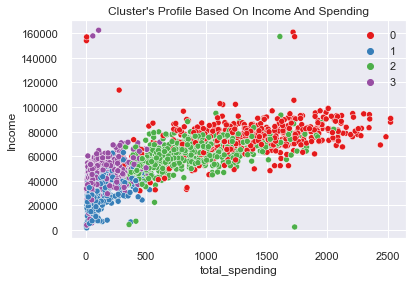

In [478]:
plot = sns.scatterplot(data = data_new ,x=data_new["total_spending"], y=data_new["Income"], 
                       hue = pipe_preds, palette = "Set1")
plot.set_title("Cluster's Profile Based On Income And Spending")
plot.legend()

PIPELINE CLUSTERING ------------------------- ORIGINAL CLUSTER (MATCH ABOVE)

0: High Income and high spendings ----------- Cluster 0: High Income and High Spendings.

1: Low Income and Low Spendings ------------- Cluster 1: Low Income and Low Spendings.

2: Average Income and High Spendings -------- Cluster 2: Average Income and High Spendings.

3: Average Income and Low Spendings. ----------- Cluster 3: Average Income and Low Spendings.


In [479]:
data_new.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'kids', 'Age',
       'loyal_for_#_month', 'total_spending', 'family_size', 'Is_parent'],
      dtype='object')

In [480]:
preprocess.predict([[2, 0, 120000, 0, 0, 78, 600, 50, 500, 200, 50, 40, 6, 2, 11, 4, 9, 0, 35, 12, 1000, 2, 0]])

array([0])

In [481]:
preprocess.predict([[1, 1, 40000, 2, 0, 50, 30, 5, 10, 20, 20, 40, 6, 2, 11, 4, 9, 2, 45, 33, 100, 2, 1]])

array([1])

In [482]:
# model_file = "Pipeline_customer.pickle"

# with open(model_file,'wb') as f:
#     pickle.dump(preprocess, f)